# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [44]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [45]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = len(Y_train)
    d = len(X_train[0])
    c1 = 0
    c2 = 0
    v1 = np.zeros((d))
    v2 = np.zeros((d))
    for i in range(n):
        if Y_train[i] == 1 :
            c1 = c1 + 1
            v1 = np.add(v1,X_train[i])
        else :
            c2 = c2 + 1
            v2 = np.add(v2,X_train[i])
    v1 = v1/c1
    v2 = v2/c2
    p1 = (c1/(c1+c2))
    p2 = (1-p1)
    out = []
    for x in X_test:
        a = ((np.linalg.norm(np.subtract(v1,x))**2)*(-1))/2
        b = ((np.linalg.norm(np.subtract(v2,x))**2)*(-1))/2
        n = (np.exp(a)*p1)/(np.exp(a)*p1 + np.exp(b)*p2)
        if n < 0.5 :
            out.append(-1)
        else :
            out.append(1)
            
    return np.array(out)
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = len(Y_train)
    d = len(X_train[0])
    c1 = 0
    c2 = 0
    v1 = np.zeros(d)
    v2 = np.zeros(d)
    l1 = []
    l2 = []
    for i in range(n):
        if Y_train[i] == 1 :
            c1 = c1 + 1
            v1 = np.add(v1,X_train[i])
            l1.append(X_train[i])
        else :
            c2 = c2 + 1
            v2 = np.add(v2,X_train[i])
            l2.append(X_train[i])
            
    v1 = v1/c1
    v2 = v2/c2
    p1 = (c1/(c1+c2))
    p2 = (1-p1)
    l1 = (np.array(l1)-v1)
    l2 = (np.array(l2)-v2)
    sigma1 = np.matmul(np.transpose(l1),l1)/c1
    sigma2 = np.matmul(np.transpose(l2),l2)/c2
    sigma = (sigma1*p1)+(sigma2*p2)
    sigmainv = np.linalg.inv(sigma)
    out = []
    
    for x in X_test:
        y = np.subtract(x,v1)
        a = (np.prod(np.matmul(np.matmul(np.transpose(y),sigmainv),y))*-1)/2
        y = np.subtract(x,v2)
        b = (np.prod(np.matmul(np.matmul(np.transpose(y),sigmainv),y))* -1)/2
        n = (np.exp(a)*p1)/(np.exp(a)*p1 + np.exp(b)*p2)
        if n <= 0.5 :
            out.append(-1)
        else :
            out.append(1)
    return np.array(out)

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = len(Y_train)
    d = len(X_train[0])
    c1 = 0
    c2 = 0
    l1 = []
    l2 = []
    v1 = np.zeros(d)
    v2 = np.zeros(d)
    for i in range(n):
        if Y_train[i] == 1 :
            c1 = c1 + 1
            v1 = np.add(v1,X_train[i])
            l1.append(X_train[i])
        else :
            c2 = c2 + 1
            v2 = np.add(v2,X_train[i]) 
            l2.append(X_train[i])
    v1 = v1/c1
    v2 = v2/c2
    p1 = (c1/(c1+c2))
    p2 = (1-p1)
    l1 = (np.array(l1)-v1)
    l2 = (np.array(l2)-v2)
    sigma1 = np.matmul(np.transpose(l1),l1)/c1
    sigma2 = np.matmul(np.transpose(l2),l2)/c2
    sigma1inv = np.linalg.inv(sigma1)
    sigma2inv = np.linalg.inv(sigma2)
    a1 = 1/np.sqrt(abs(np.linalg.det(sigma1)))
    b1 = 1/np.sqrt(abs(np.linalg.det(sigma2)))
    out = []
    
    for x in X_test:
        y = np.subtract(x,v1)
        a = (np.matmul(np.matmul(np.transpose(y),sigma1inv),y)*-1)/2
        y = np.subtract(x,v2)
        b = (np.matmul(np.matmul(np.transpose(y),sigma2inv),y)* -1)/2
        n = (a1*np.exp(a)*p1)/(a1*np.exp(a)*p1 + b1*np.exp(b)*p2)
        if n <= 0.5 :
            out.append(-1)
        else :
            out.append(1)
    return np.array(out)


In [46]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


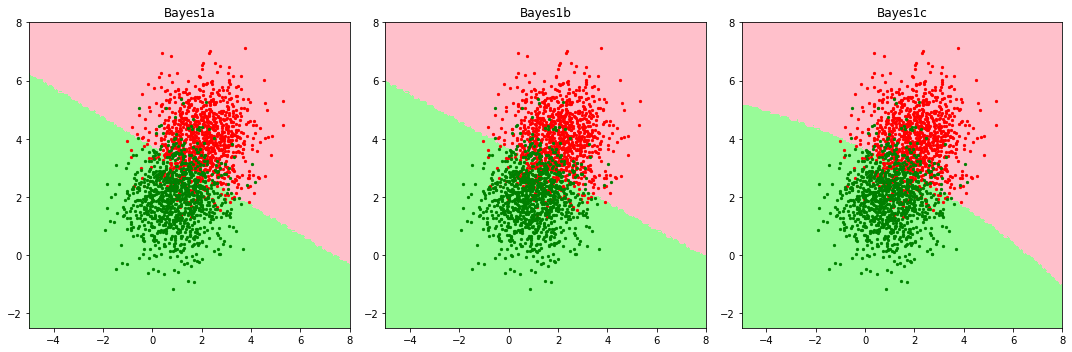

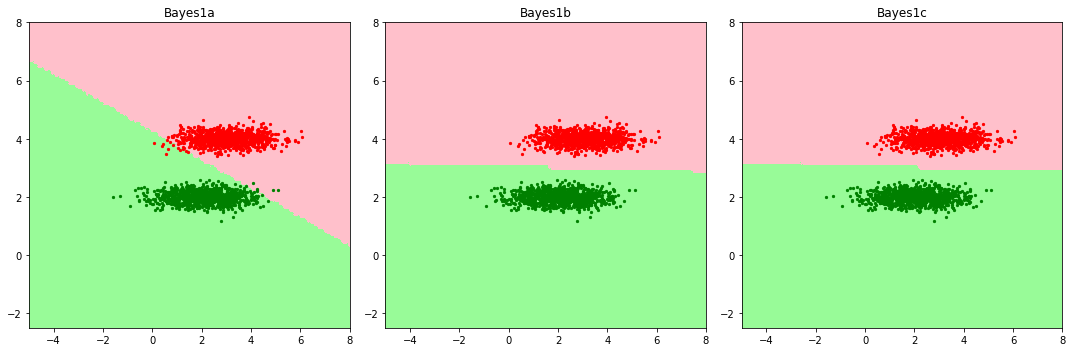

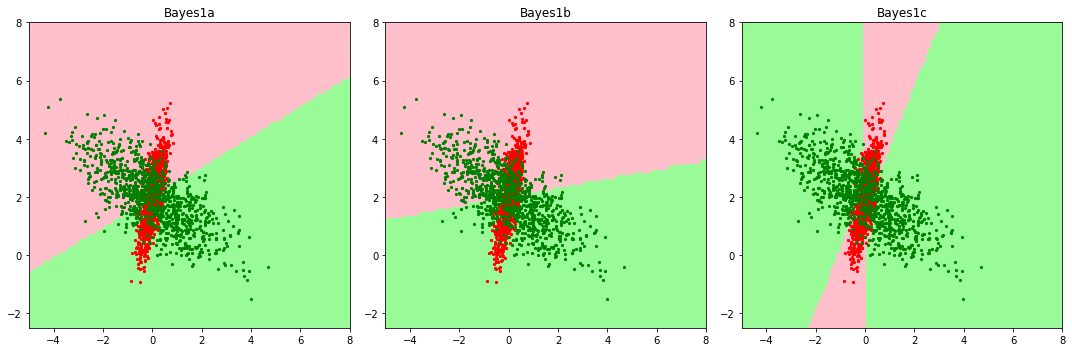

In [47]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)


def myfunc(x):
    
    X_train1 = x['arr_0']
    Y_train1 = x['arr_1']
    X_test1 =  x['arr_2']
    Y_test1 =  x['arr_3']

    Y_pred_test_1a = Bayes1a(X_train1, Y_train1, X_test1)
    Y_pred_test_1b = Bayes1b(X_train1, Y_train1, X_test1)
    Y_pred_test_1c = Bayes1c(X_train1, Y_train1, X_test1)
    
    n = len(X_train1)
    c1 = 0
    c2 = 0
    c3 = 0    
    for i in range(n) :
        if Y_pred_test_1a[i] == Y_test1[i]:
            c1 = c1 + 1
        if Y_pred_test_1b[i] == Y_test1[i] :
            c2 = c2 + 1
        if Y_pred_test_1c[i] == Y_test1[i] :
            c3 = c3 + 1
            
    #print("---------")
    #print(c1/n)
    #print(c2/n)
    #print(c3/n)
    
    fig,ax = plt.subplots(1,3,figsize = (15,5))
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(len(X_train1)):
        if(Y_train1[i] == -1) :
            x1.append(X_train1[i][0])
            y1.append(X_train1[i][1])
        else :
            x2.append(X_train1[i][0])
            y2.append(X_train1[i][1])
    x1 = np.array(x1)
    y1 = np.array(y1)
    x2 = np.array(x2)
    y2 = np.array(y2)
    
    X,Y = np.meshgrid(np.linspace(-5,8,100), np.linspace(-2.5,8,100))

    A = []

    for i in range(100):
        for j in range(100):
            A.append(np.array([X[i][j],Y[i][j]]))
            
    
    Z = np.array(A)
    Z = Bayes1a(X_train1, Y_train1,Z)
    Z = np.reshape(Z,(-1,100))
    s = ax[0].contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),extend = 'both',colors = ["pink","palegreen"])
    #fig.colorbar(s,ax = ax[0])
    ax[0].set_title("Bayes1a")
    
    ax[0].scatter(x1,y1,c = "red",s = 5)
    ax[0].scatter(x2,y2,c = "green",s = 5)
    
    Z = np.array(A)
    Z = Bayes1b(X_train1, Y_train1,Z)
    Z = np.reshape(Z,(-1,100))
    s = ax[1].contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),extend = 'both',colors = ["pink","palegreen"])
    #fig.colorbar(s,ax = ax[1])
    ax[1].set_title("Bayes1b")
    
    ax[1].scatter(x1,y1,c = "red",s = 5)
    ax[1].scatter(x2,y2,c = "green",s = 5)
    
    Z = np.array(A)
    Z = Bayes1c(X_train1, Y_train1,Z)
    Z = np.reshape(Z,(-1,100))
    s = ax[2].contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),extend = 'both',colors = ["pink","palegreen"])
    #fig.colorbar(s,ax = ax[2])
    ax[2].set_title("Bayes1c")
    
    ax[2].scatter(x1,y1,c = "red",s = 5)
    ax[2].scatter(x2,y2,c = "green",s = 5)
    
    plt.tight_layout()
    plt.show()
    
    

x = np.load("../../Data/dataset1_1.npz")
myfunc(x)
x = np.load("../../Data/dataset1_2.npz")
myfunc(x)
x = np.load("../../Data/dataset1_3.npz")
myfunc(x)

### Error Percentage table
     
|  Error  |   Bayes1a   |  Bayes2a  |  Bayes3a |
|---------|-------------|-----------|----------|
| sample1|   12.60%    |  12.45%   |  12.45%  |
| sample2 |   0.85%     |  0        |  0       | 
| sample3 |   49.70%    |  49.50%   |  13.50%  |

Observations: 

1) The classifiers Bayes 1a & Bayes 1b are generating a linear boundary because we assumed same covariance for both the classes , so these are predicting well on the data which is linearly seperable & are failing when the boundaries are complicated

2) The classifier Bayes 1c is generating a non linear boundary this is due to the assumption of different covariance and hence this is predicting well also on the data which is not linearly seperable 



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [48]:
# Cell type : CodeWrite
# Fill in functions in this cell


def myhelper(X_train,Y_train):
    n = len(Y_train)
    d = len(X_train[0])
    c1 = 0
    c2 = 0
    c3 = 0
    c4 = 0
    v1 = np.zeros(d)
    v2 = np.zeros(d)
    v3 = np.zeros(d)
    v4 = np.zeros(d)
    for i in range(n):
        if Y_train[i] == 1 :
            c1 = c1 + 1
            v1 = np.add(v1,X_train[i])
        elif Y_train[i] == 2 :
            c2 = c2 + 1
            v2 = np.add(v2,X_train[i])
        elif Y_train[i] == 3 :
            c3 = c3 + 1
            v3 = np.add(v3,X_train[i])
        else :
            c4 = c4 + 1
            v4 = np.add(v4,X_train[i])
    v1 = v1/c1
    v2 = v2/c2
    v3 = v3/c3
    v4 = v4/c4
    p1 = c1/n
    p2 = c2/n
    p3 = c3/n
    p4 = c4/n
   # print([[v1,v2,v3,v4],[p1,p2,p3,p4]])
    return [[v1,v2,v3,v4],[p1,p2,p3,p4]]

def geteta(a,p,c):
    den = 0
    for i in range(4) :
        den = (den + (c[i]*np.exp(a[i])*p[i]))
    out = []
    for i in range(4) :
        out.append((c[i]*np.exp(a[i])*p[i])/den)
    return out

def optimal(eta) :
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    #print(eta)
    val = np.matmul(np.array(eta),L)
   # print(val)
    out = 1
    curr = val[0]
    for i in range(4):
        if val[i] <= curr :
            curr = val[i]
            out = (i+1)
    return out
def myfun(X_train,Y_train,mu):
    l = [[],[],[],[]]
    for i in range(len(X_train)) :
        if Y_train[i] == 1 :
            l[0].append(X_train[i]-mu[0])
        elif Y_train[i] == 2 :
            l[1].append(X_train[i]-mu[1])
        elif Y_train[i] == 3 :
            l[2].append(X_train[i]-mu[2])
        else :
            l[3].append(X_train[i]-mu[3])
    out = []
    for x in l :
        g = np.array(x)
        out.append((np.matmul(np.transpose(g),g))/len(x))
    return out

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    l = myhelper(X_train,Y_train)  # lis the list
    # l[0] is mu , l[1] is probability
    out = []
    for x in X_test :
        a = []
        for i in range(4) :
            a.append(((np.linalg.norm(np.subtract(l[0][i],x)) ** 2)*(-1))/2)
        eta = geteta(a,l[1],[1,1,1,1])
        #print(eta)
        out.append(optimal(eta))
    #print(out)
    return np.array(out,dtype = int)
    
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    l = myhelper(X_train,Y_train)
    f = myfun(X_train,Y_train,l[0])
    d = len(X_train[0])
    sigma = np.zeros([d,d])
    for i in range(4):
        sigma = (sigma + (f[i]*l[1][i]))
    sigmainv = np.linalg.inv(sigma)
    out = []
    for x in X_test :
        a = []
        for i in range(4) :
            a.append((np.matmul(np.matmul(np.transpose(x-l[0][i]),sigmainv),(x -l[0][i]))*-1)/2)
        eta = geteta(a,l[1],[1,1,1,1])
        #print(eta)
        out.append(optimal(eta))
    #print(out)
    return np.array(out,dtype = int)
    

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    l = myhelper(X_train,Y_train)
    sigma = myfun(X_train,Y_train,l[0])
    sigmainv = []
    c = []
    for x in sigma:
        sigmainv.append(np.linalg.inv(x))
        c.append(1/np.sqrt(abs(np.linalg.det(x))))

    out = []
    for x in X_test :
        a = []
        for i in range(4) :
            a.append((np.matmul(np.matmul(np.transpose(x-l[0][i]),sigmainv[i]),(x -l[0][i]))*-1)/2)
        eta = geteta(a,l[1],c)
        out.append(optimal(eta))
    return np.array(out,dtype = int)

In [49]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


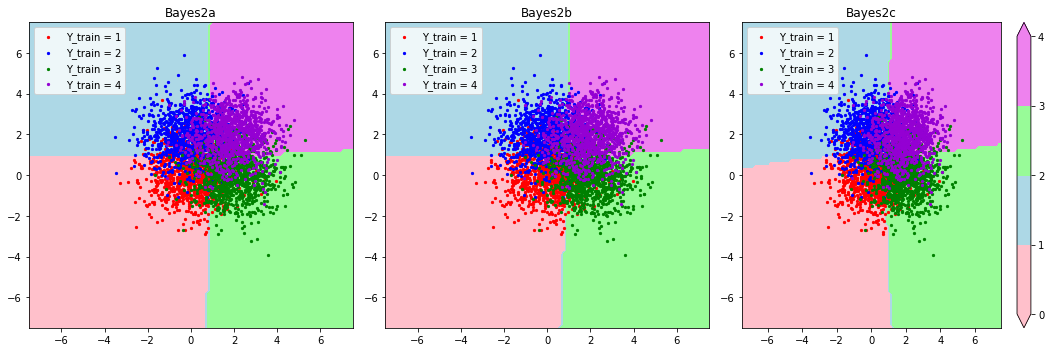

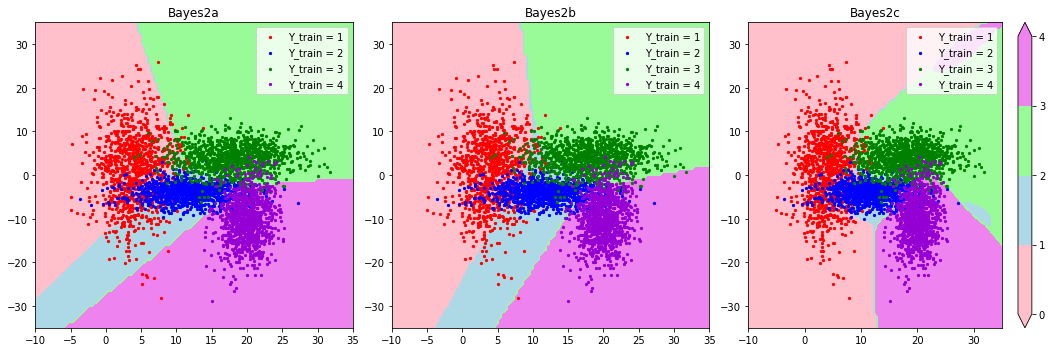

In [50]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])



def myfunc(x,flag):
    
    X_train2 = x['arr_0']
    Y_train2 = x['arr_1']
    X_test2=  x['arr_2']
    Y_test2 =  x['arr_3']

    Y_pred_test_2a = Bayes2a(X_train2, Y_train2, X_test2)
    Y_pred_test_2b = Bayes2b(X_train2, Y_train2, X_test2)
    Y_pred_test_2c = Bayes2c(X_train2, Y_train2, X_test2)
    L1 = np.zeros([4,4])
    L2 = np.zeros([4,4])
    L3 = np.zeros([4,4])
    
    #print(Y_pred_test_2a)
    #print(Y_test2[0]-1)
    """
    for i in range(len(Y_test2)) :
            L1[Y_pred_test_2a[i]-1][int(Y_test2[i])-1] = L1[Y_pred_test_2a[i]-1][int(Y_test2[i])-1] + 1
            L2[Y_pred_test_2b[i]-1][int(Y_test2[i])-1] = L2[Y_pred_test_2b[i]-1][int(Y_test2[i])-1] + 1
            L3[Y_pred_test_2c[i]-1][int(Y_test2[i])-1] = L3[Y_pred_test_2c[i]-1][int(Y_test2[i])-1] + 1
    
    print('------------')
    print(L1)
    print(L1.trace()/L1.sum())
    print(L2)
    print(L2.trace()/L2.sum())
    print(L3)
    print(L3.trace()/L3.sum())
    """
    fig,ax = plt.subplots(1,3,figsize = (15,5))
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    x3 = []
    y3 = []
    x4 = []
    y4 = []
    for i in range(len(X_train2)):
        if(Y_train2[i] == 1) :
            x1.append(X_train2[i][0])
            y1.append(X_train2[i][1])
        elif(Y_train2[i] == 2):
            x2.append(X_train2[i][0])
            y2.append(X_train2[i][1])
        elif(Y_train2[i] == 3):
            x3.append(X_train2[i][0])
            y3.append(X_train2[i][1])
        else:
            x4.append(X_train2[i][0])
            y4.append(X_train2[i][1])
        
    x1 = np.array(x1)
    y1 = np.array(y1)
    x2 = np.array(x2)
    y2 = np.array(y2)
    x3 = np.array(x3)
    y3 = np.array(y3)
    x4 = np.array(x4)
    y4 = np.array(y4)
    X = []
    Y = []
    if(flag == 0):
        X,Y = np.meshgrid(np.linspace(-7.5,7.5,100), np.linspace(-7.5,7.5,100))
    else :
        X,Y = np.meshgrid(np.linspace(-10,35,100), np.linspace(-35,35,100))
    A = []

    for i in range(100):
        for j in range(100):
            A.append(np.array([X[i][j],Y[i][j]]))
            
    
    Z = np.array(A)
    Z = Bayes2a(X_train2, Y_train2,Z)
    Z = np.reshape(Z,(-1,100))
    s = ax[0].contourf(X,Y,Z,levels= [0,1,2,3,4],extend = 'both',colors = ('pink','lightblue','palegreen','violet'))
    #fig.colorbar(s,ax = ax[0])
    ax[0].set_title("Bayes2a")
    
    ax[0].scatter(x1,y1,c = "red",label = 'Y_train = 1',s = 5)
    ax[0].scatter(x2,y2,c = "blue",label = 'Y_train = 2',s = 5)
    ax[0].scatter(x3,y3,c = "green",label = 'Y_train = 3',s = 5)
    ax[0].scatter(x4,y4,c = "darkviolet",label = 'Y_train = 4',s = 5)
    ax[0].legend()
    
    Z = np.array(A)
    Z = Bayes2b(X_train2, Y_train2,Z)
    Z = np.reshape(Z,(-1,100))
    ax[1].contourf(X,Y,Z,levels=[0,1,2,3,4],extend = 'both',colors = ["pink","lightblue","palegreen","violet"])
    #fig.colorbar(s,ax = ax[1])
    ax[1].set_title("Bayes2b")
    
    ax[1].scatter(x1,y1,c = "red",label = 'Y_train = 1',s = 5)
    ax[1].scatter(x2,y2,c = "blue",label = 'Y_train = 2',s = 5)
    ax[1].scatter(x3,y3,c = "green",label = 'Y_train = 3',s = 5)
    ax[1].scatter(x4,y4,c = "darkviolet",label = 'Y_train = 4',s = 5)
    ax[1].legend()
    
    Z = np.array(A)
    Z = Bayes2c(X_train2, Y_train2,Z)
    Z = np.reshape(Z,(-1,100))
    s = ax[2].contourf(X,Y,Z,levels=[0,1,2,3,4],extend = 'both',colors = ["pink","lightblue","palegreen","violet"])
    fig.colorbar(s,ax = ax[2])
    ax[2].set_title("Bayes2c")
    
    ax[2].scatter(x1,y1,c = "red",label = 'Y_train = 1',s = 5)
    ax[2].scatter(x2,y2,c = "blue",label = 'Y_train = 2',s = 5)
    ax[2].scatter(x3,y3,c = "green",label = 'Y_train = 3',s = 5)
    ax[2].scatter(x4,y4,c = "darkviolet",label = 'Y_train = 4',s = 5)
    ax[2].legend()
    #plt.legend(['Y_train = 1','Y_train = 2','Y_train = 3','Y_train = 4'])
    plt.tight_layout()
    plt.show()
    
x = np.load("../../Data/dataset2_1.npz")
myfunc(x,0)
x = np.load("../../Data/dataset2_2.npz")
myfunc(x,1)


** Cell type : TextWrite ** 
(Write your observations and table of errors here)
#### (4 x 4 Confusion Matrices for dataset2_1)


|    Accuracy = 69.9%    |
|   :------:            |

|Bayes2a | true_val_1|true_val_2|true_val_3|true_val_4|
|:----:	|:----:|:----:|:----:|:----:|
|predict_val_1 |633|97|86|15|
|predict_val_2 |219|738|49|136|
|predict_val_3  |136|62|770|194|
|predict_val_4 	|12|103|95|655|


|    Accuracy = 70%    |
|   :------:            |

|Bayes2b | true_val_1|true_val_2|true_val_3|true_val_4|
|:----:	|:----:|:----:|:----:|:----:|
|predict_val_1 |633|95|84|16|
|predict_val_2 |218|743|49|137|
|predict_val_3 |137|60|773|196|
|predict_val_4 |12|102|94|651|


|    Accuracy = 69.95%    |
|   :------:            |

|Bayes2c | true_val_1|true_val_2|true_val_3|true_val_4|
|:----:	|:----:|:----:|:----:|:----:|
|predict_val_1 |634|99|87|15|
|predict_val_2 |217|742|47|134|
|predict_val_3 |138|61|772|201|
|predict_val_4 |11|98|94|650|


#### (4 x 4 Confusion Matrices for dataset2_2)


|    Accuracy = 85.45%    |
|   :------:            |

|Bayes2a | true_val_1|true_val_2|true_val_3|true_val_4|
|:----:	|:----:|:----:|:----:|:----:|
|predict_val_1 |830|93|30|0|
|predict_val_2 |150|784|61|23|
|predict_val_3 |18|46|905|78|
|predict_val_4 |2|77|4|899|


|    Accuracy = 83.475%    |
|   :------:            |

|Bayes2b | true_val_1|true_val_2|true_val_3|true_val_4|
|:----:	|:----:|:----:|:----:|:----:|
|predict_val_1 |891|119|23|0|
|predict_val_2 |106|691|106|5|
|predict_val_3 |3|124|864|102|
|predict_val_4 |0|66|7|893|


|    Accuracy = 89.425%    |
|   :------:            |

|Bayes2c | true_val_1|true_val_2|true_val_3|true_val_4|
|:----:	|:----:|:----:|:----:|:----:|
|predict_val_1 |901|64|19|0|
|predict_val_2 |80|824|31|36|
|predict_val_3 |19|46|936|48|
|predict_val_4 |0|66|14|916|




#### Expected Loss computed through Loss Matrix

|dataset/algorithm| Bayes2a | Bayes2b | Bayes2c |
|  :----: |  :----: |  :----: |   :----:  |
| dataset2_1 | 42.975% | 42.9% | 42.775% |
| dataset2_2 | 18.35% | 18.95% | 14.075%|


Observations: 

1) Here also the observation is same as the question number 1 except that here we are dealing with multivariate class . 

2) As for Bayes2a and Bayes 2b we assumed common covariance for all the classes so these algorithms are predicting well on the data with linear boundaries

3) Whereas for Bayes 2c as we assumed that the Covariance is unkown and might be different for all the classes the algorithm is able to predict well for the complicated boundaries .




**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




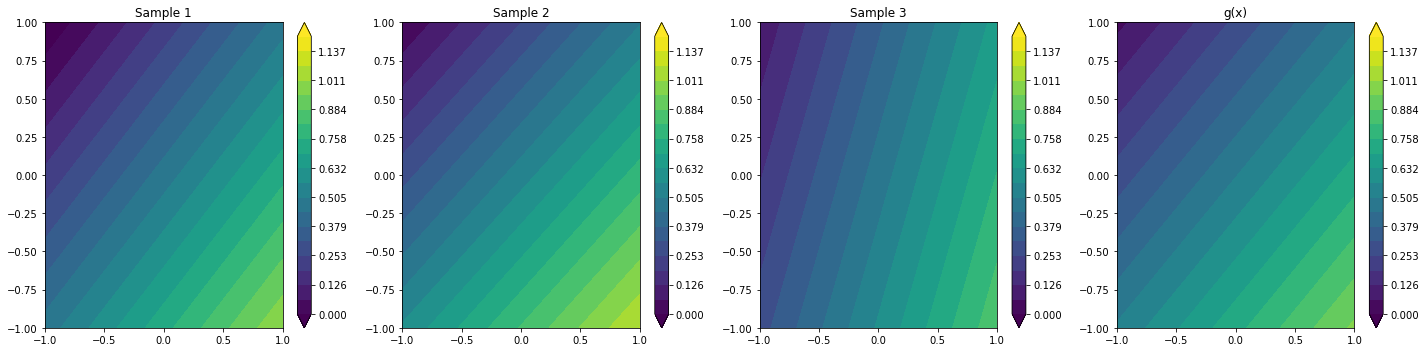

Degree= 1 lambda= 1e-07
Bias = 0.055276440126803994
Variance = 0.003449870098890979
MSE = 0.05872631022569499


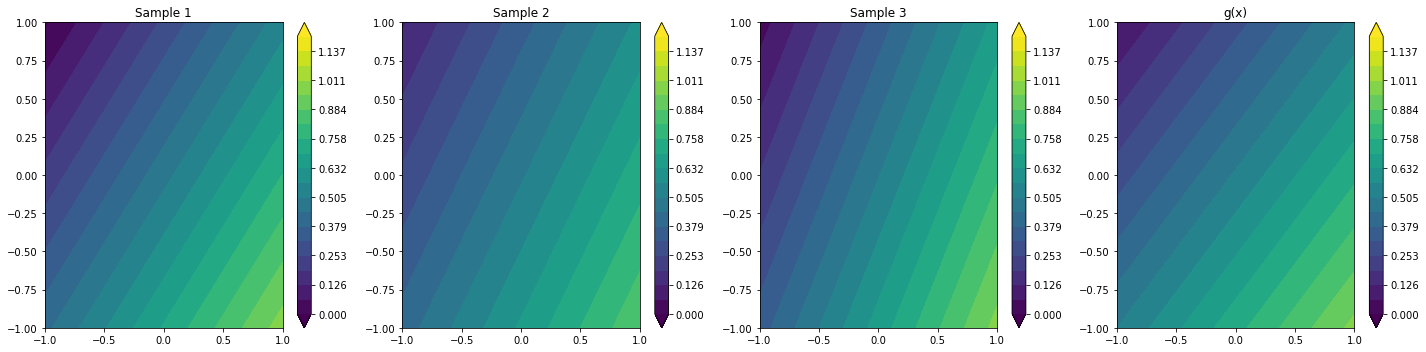

Degree= 1 lambda= 1e-05
Bias = 0.05552283123918704
Variance = 0.00397951146225398
MSE = 0.05950234270144102


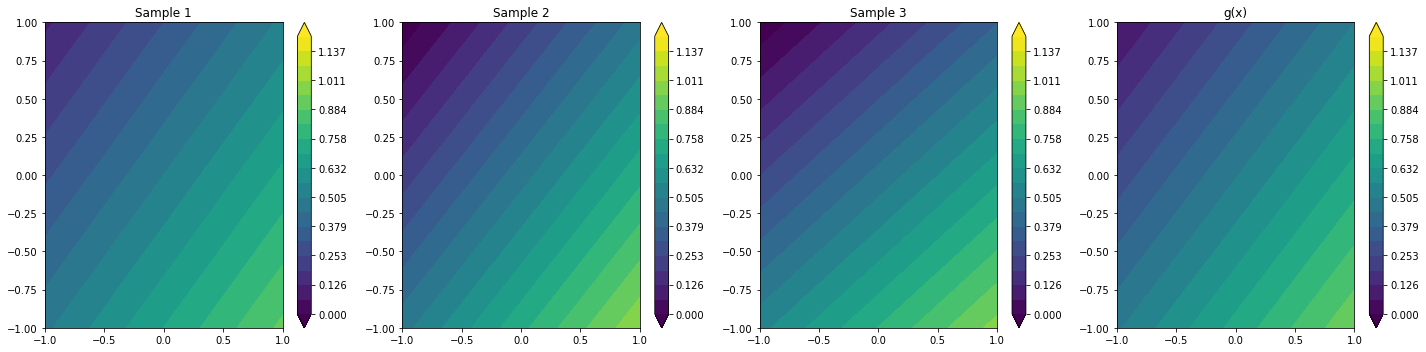

Degree= 1 lambda= 0.001
Bias = 0.055123265036398264
Variance = 0.003685283409874971
MSE = 0.058808548446273236


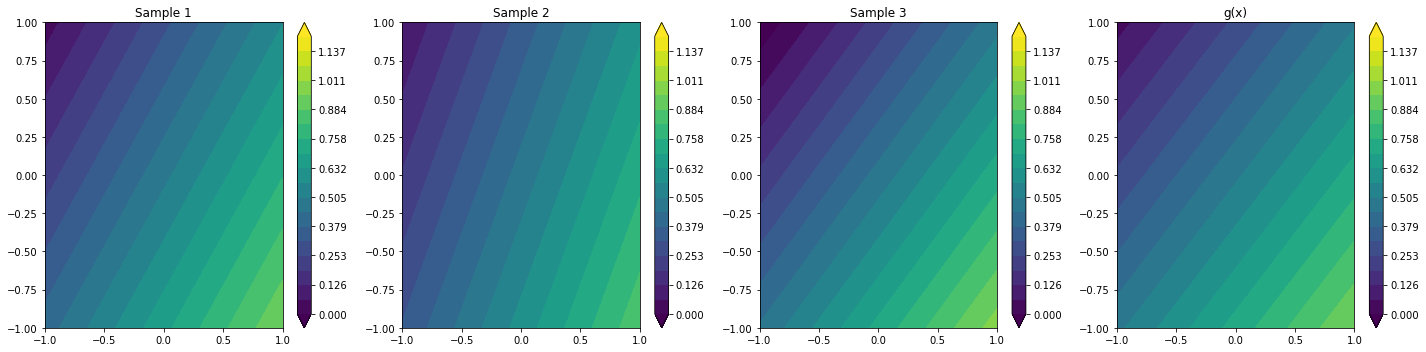

Degree= 1 lambda= 0.1
Bias = 0.05519370746543444
Variance = 0.003774523931954232
MSE = 0.058968231397388673


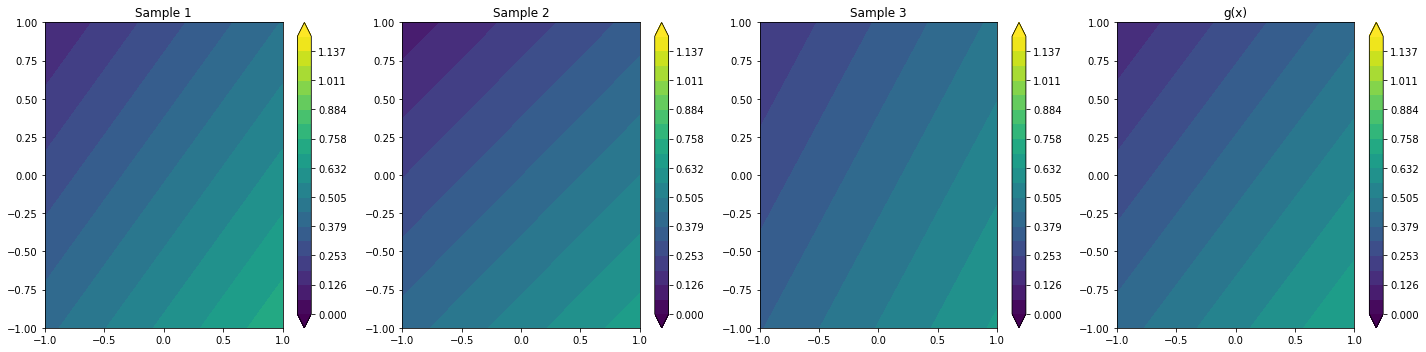

Degree= 1 lambda= 10.0
Bias = 0.06557417137223048
Variance = 0.001372461337319142
MSE = 0.06694663270954959


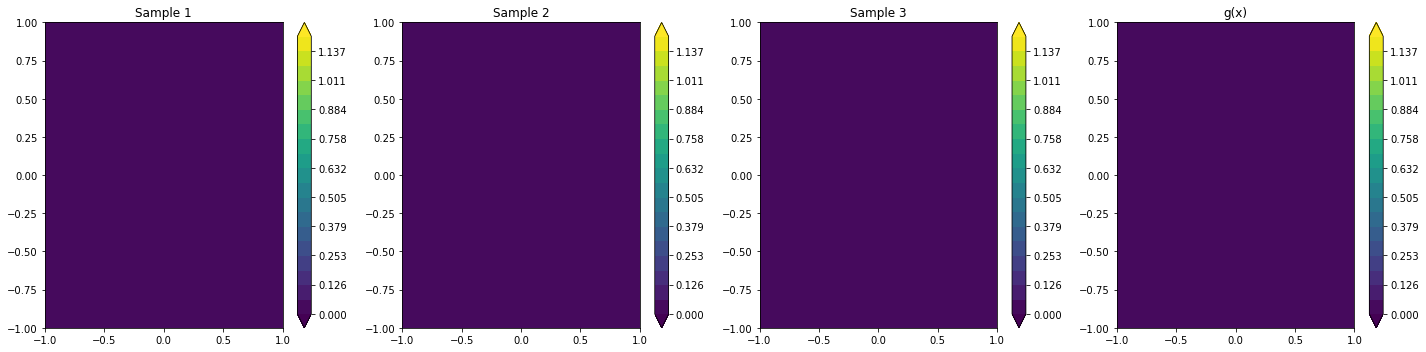

Degree= 1 lambda= 1000.0
Bias = 0.3071408522087686
Variance = 6.04463732983218e-06
MSE = 0.3071468968460985


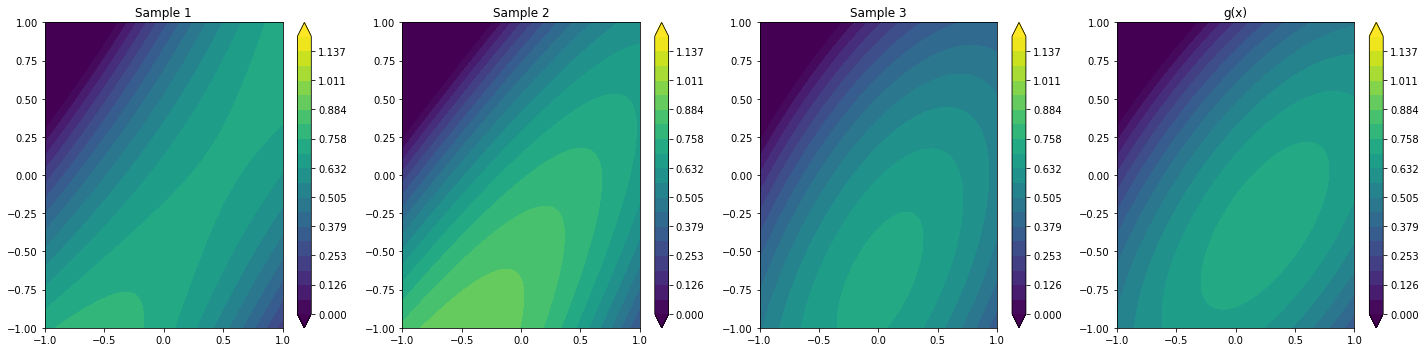

Degree= 2 lambda= 1e-07
Bias = 0.03482775748555015
Variance = 0.005596444140903804
MSE = 0.04042420162645395


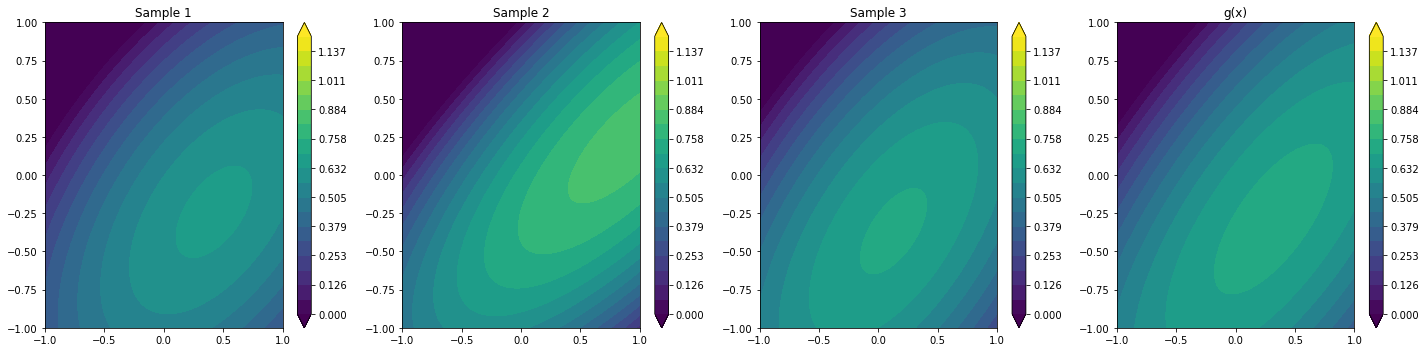

Degree= 2 lambda= 1e-05
Bias = 0.03485919539406666
Variance = 0.005416236635197423
MSE = 0.040275432029264084


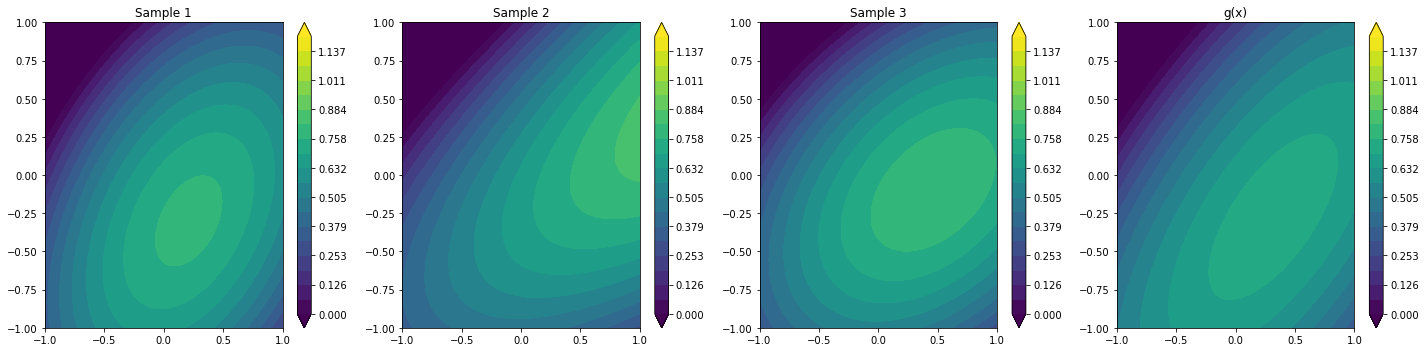

Degree= 2 lambda= 0.001
Bias = 0.03488124325577617
Variance = 0.005155742524788301
MSE = 0.040036985780564464


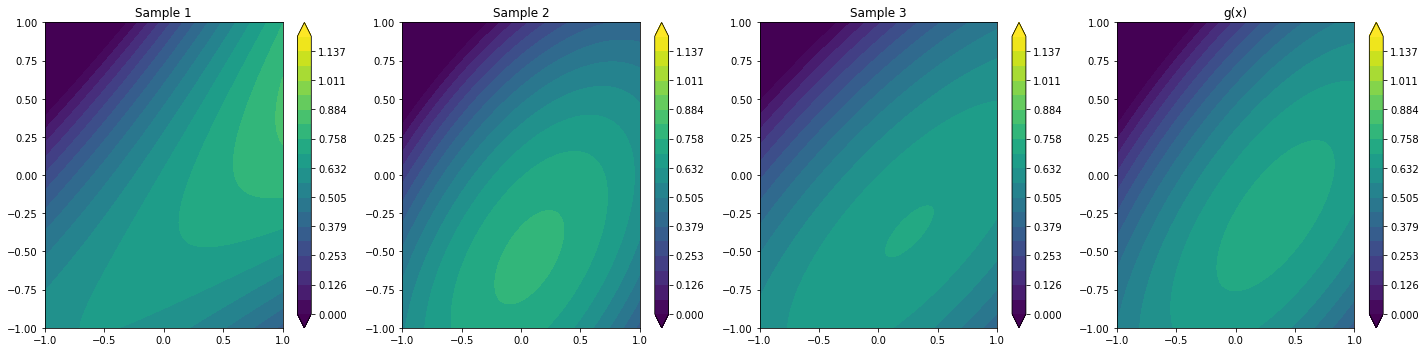

Degree= 2 lambda= 0.1
Bias = 0.03475506467307357
Variance = 0.005289604061024045
MSE = 0.04004466873409761


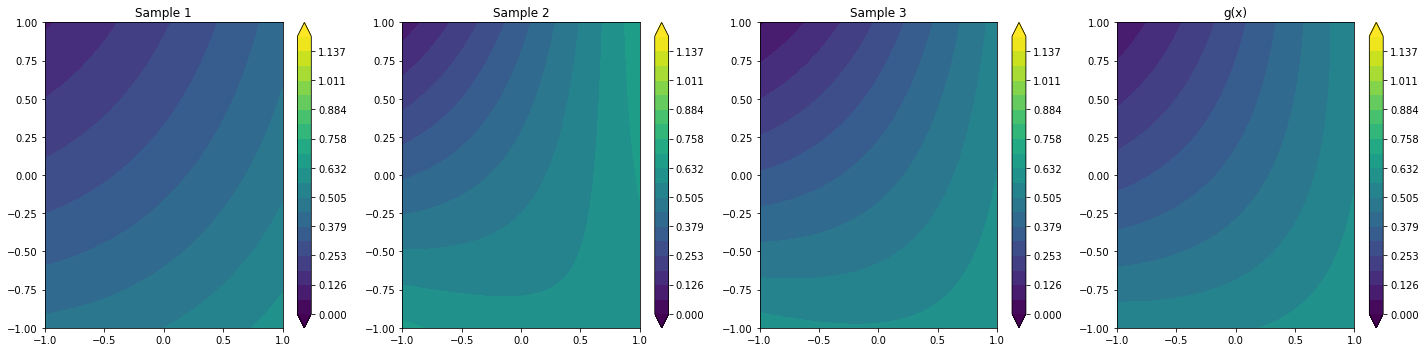

Degree= 2 lambda= 10.0
Bias = 0.062121785965583855
Variance = 0.0020394278455440774
MSE = 0.06416121381112795


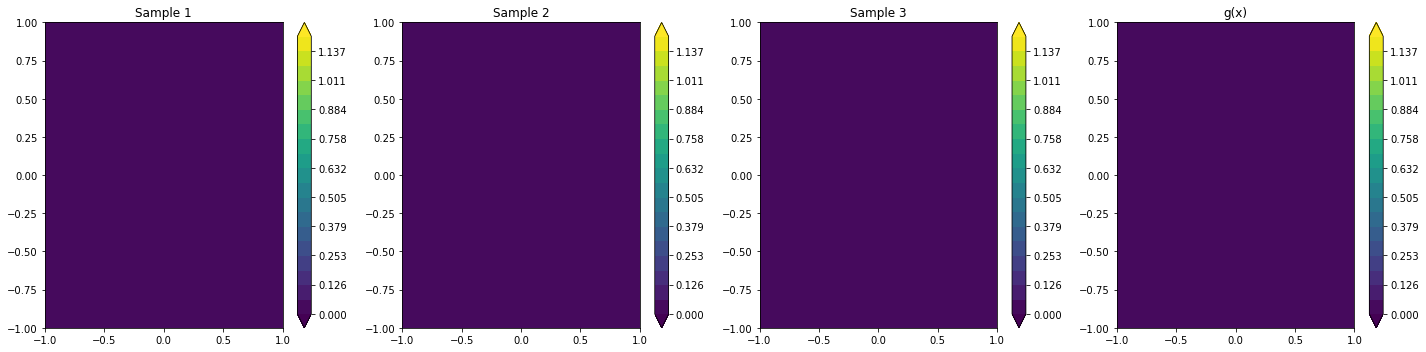

Degree= 2 lambda= 1000.0
Bias = 0.30361570432782836
Variance = 8.651193642272216e-06
MSE = 0.3036243555214706


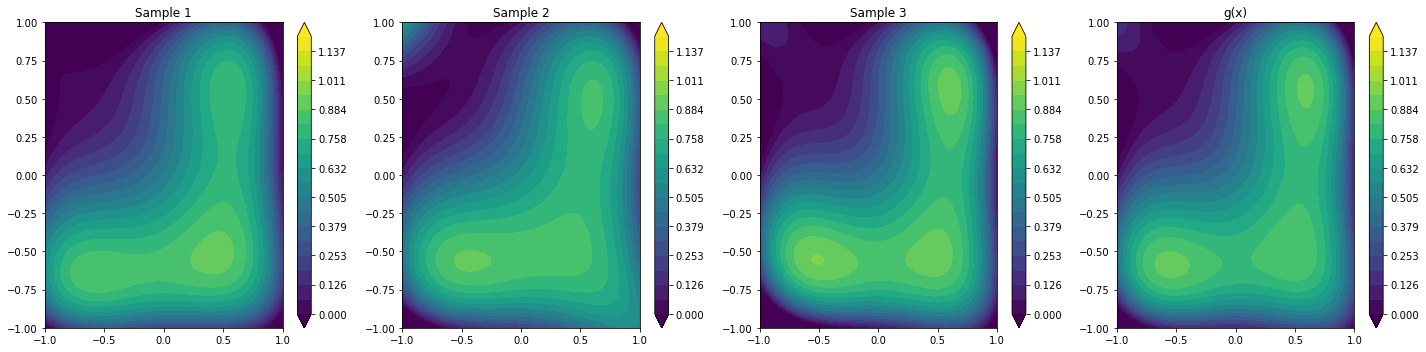

Degree= 4 lambda= 1e-07
Bias = 0.007998239833341029
Variance = 0.007421336950929537
MSE = 0.015419576784270575


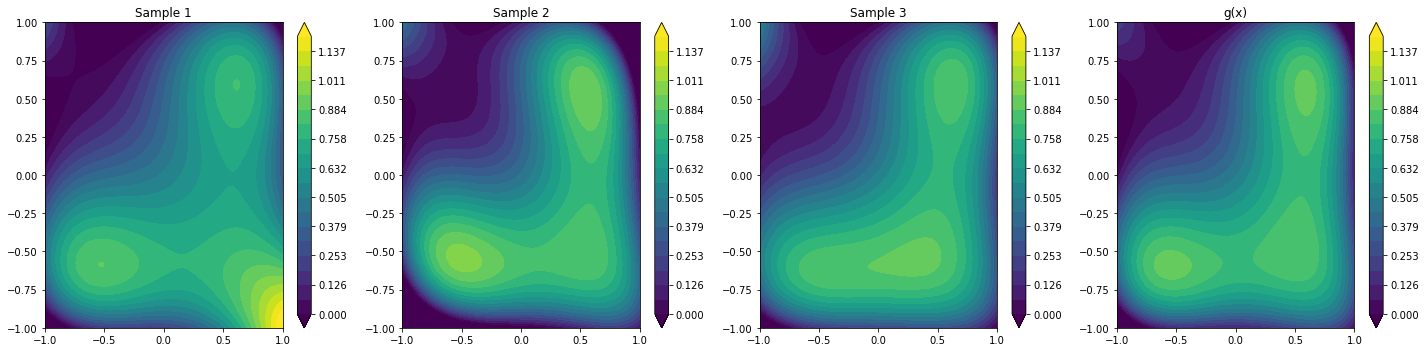

Degree= 4 lambda= 1e-05
Bias = 0.00807115672828519
Variance = 0.00890231327027305
MSE = 0.01697346999855824


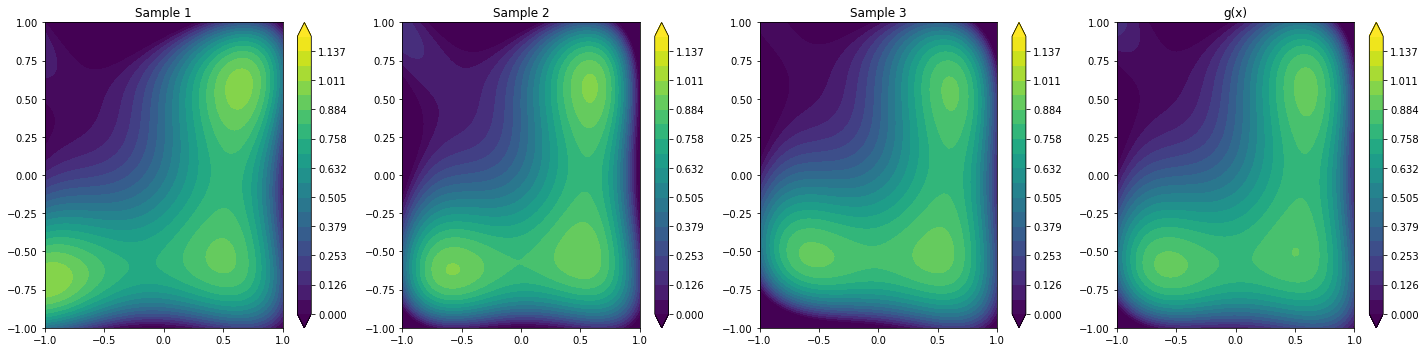

Degree= 4 lambda= 0.001
Bias = 0.007845788203098175
Variance = 0.009698656104281174
MSE = 0.01754444430737935


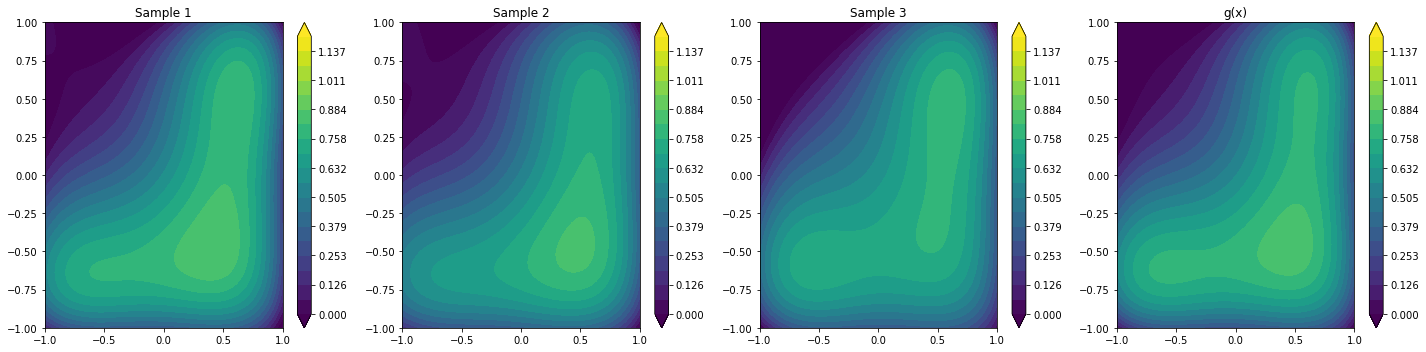

Degree= 4 lambda= 0.1
Bias = 0.00936050673043018
Variance = 0.004486272139841806
MSE = 0.013846778870271987


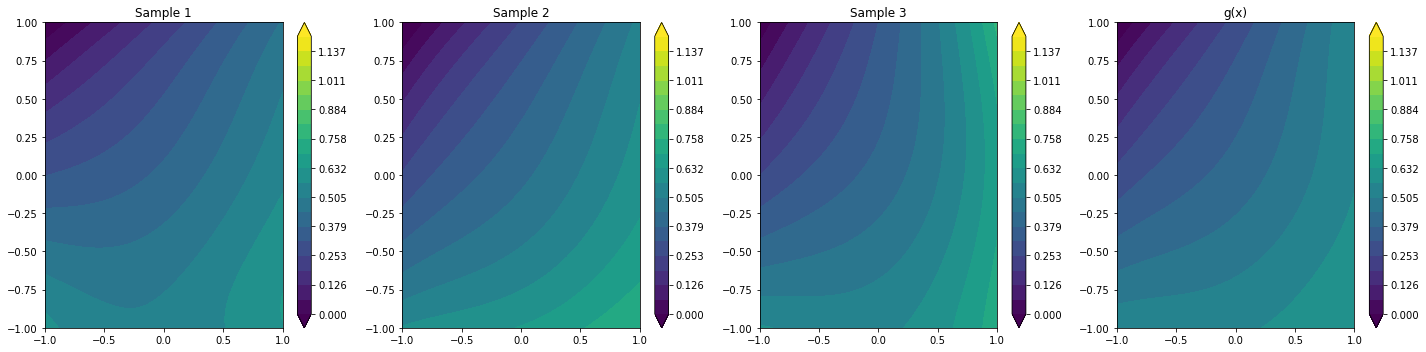

Degree= 4 lambda= 10.0
Bias = 0.060143535845065446
Variance = 0.002185995520014935
MSE = 0.06232953136508038


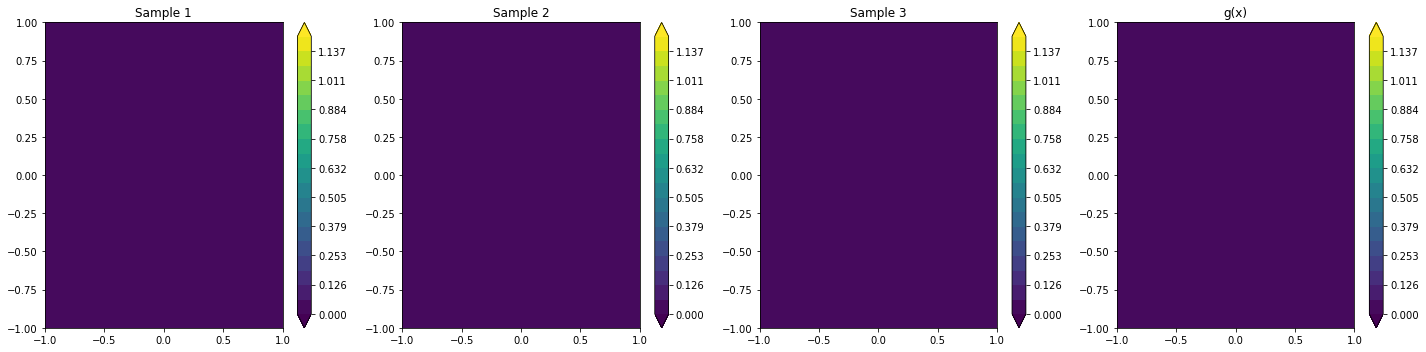

Degree= 4 lambda= 1000.0
Bias = 0.3025833435790876
Variance = 1.081373697196386e-05
MSE = 0.30259415731605954


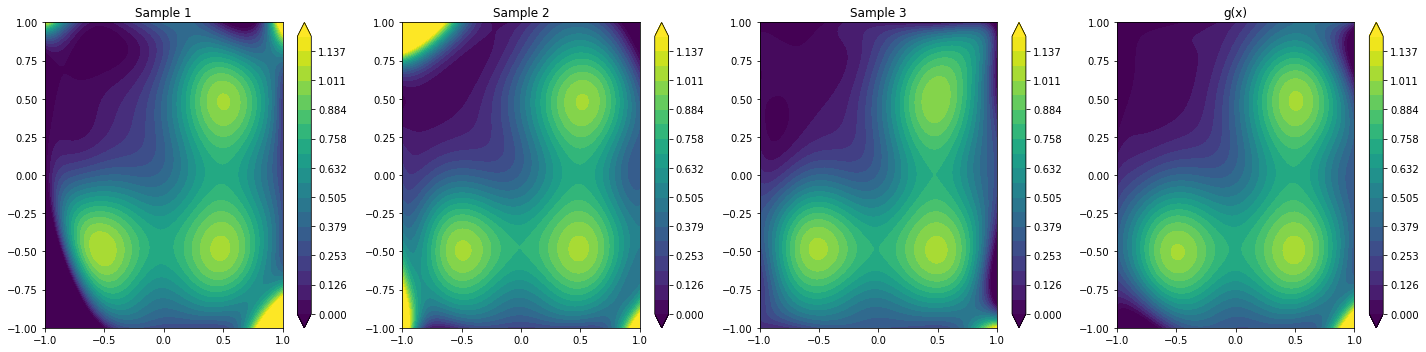

Degree= 8 lambda= 1e-07
Bias = 0.011717169953744767
Variance = 0.22582194824602894
MSE = 0.23753911819977377


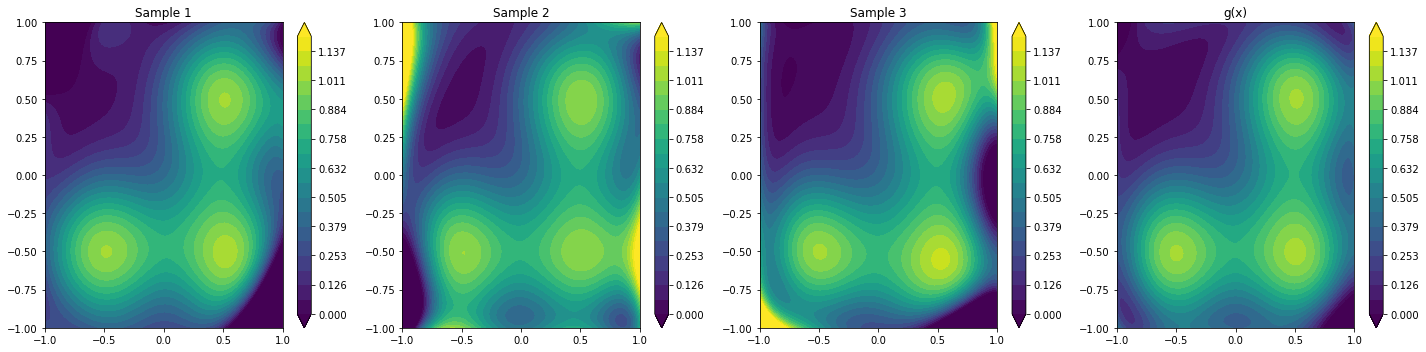

Degree= 8 lambda= 1e-05
Bias = 0.004682679978297925
Variance = 0.06534433315052846
MSE = 0.07002701312882637


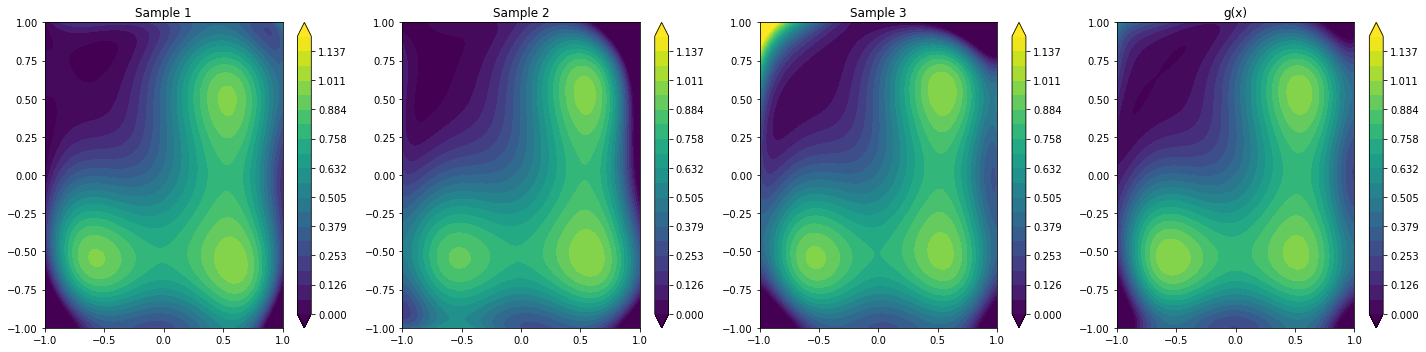

Degree= 8 lambda= 0.001
Bias = 0.007218348388794481
Variance = 0.022463121370455478
MSE = 0.029681469759249922


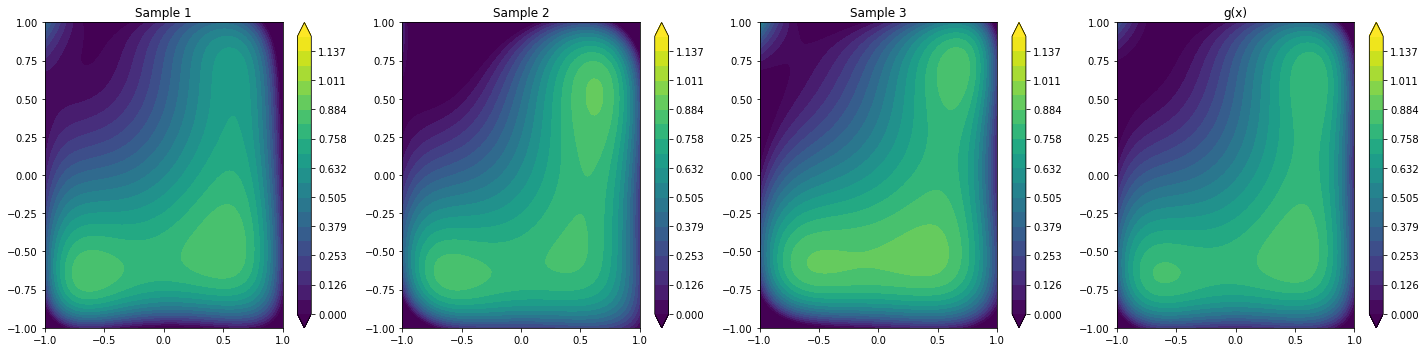

Degree= 8 lambda= 0.1
Bias = 0.010011457707694281
Variance = 0.007274948282093627
MSE = 0.017286405989787906


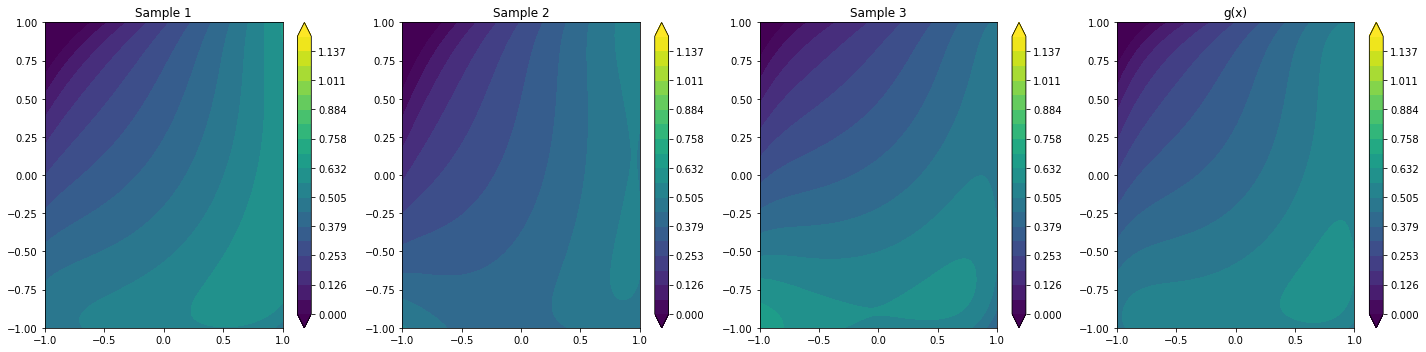

Degree= 8 lambda= 10.0
Bias = 0.05567079700979117
Variance = 0.0026554929743109923
MSE = 0.05832628998410216


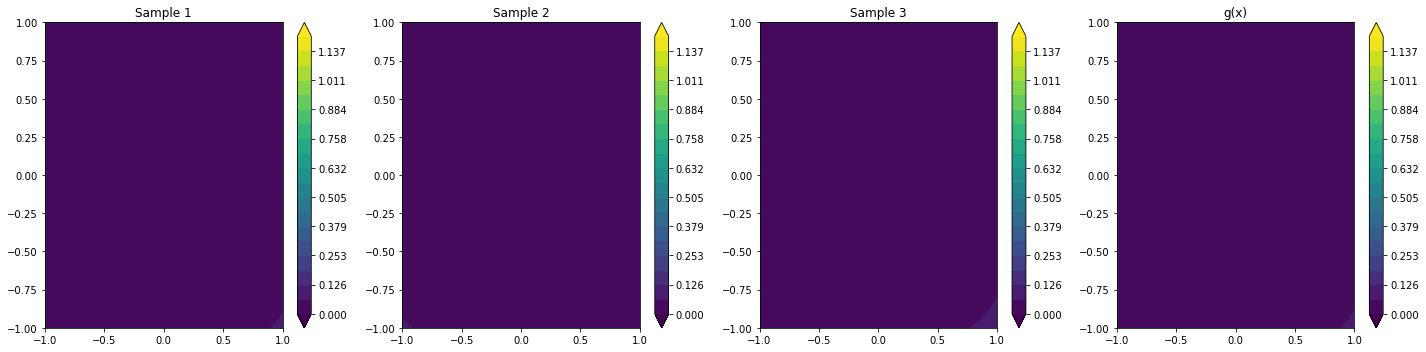

Degree= 8 lambda= 1000.0
Bias = 0.3012763438347996
Variance = 1.4259035970138357e-05
MSE = 0.30129060287076975


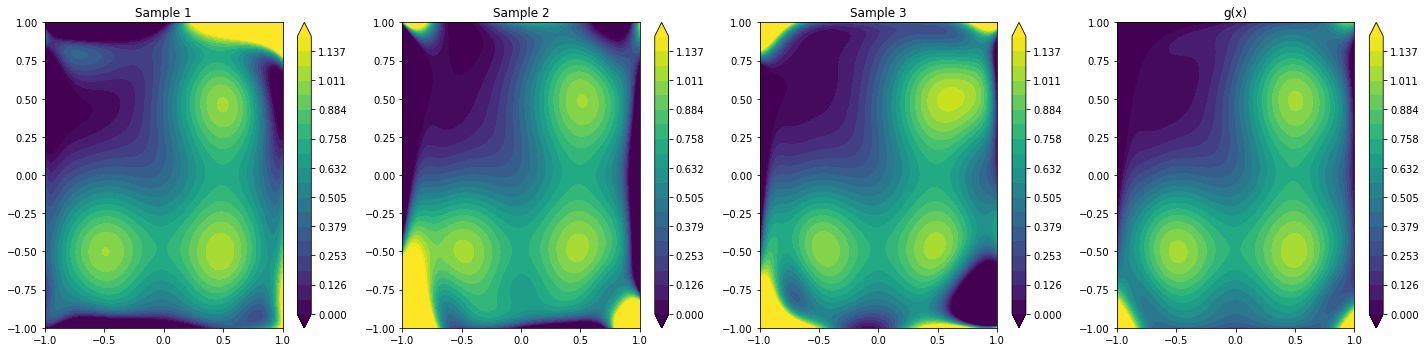

Degree= 16 lambda= 1e-07
Bias = 0.03775270340610338
Variance = 0.4314630651216062
MSE = 0.4692157685277097


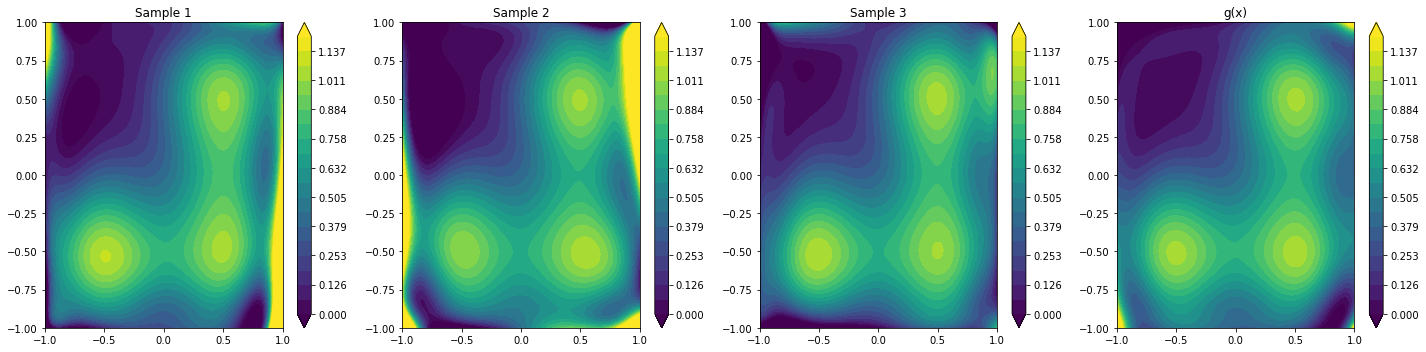

Degree= 16 lambda= 1e-05
Bias = 0.013140201004571259
Variance = 0.1932977261667089
MSE = 0.20643792717128012


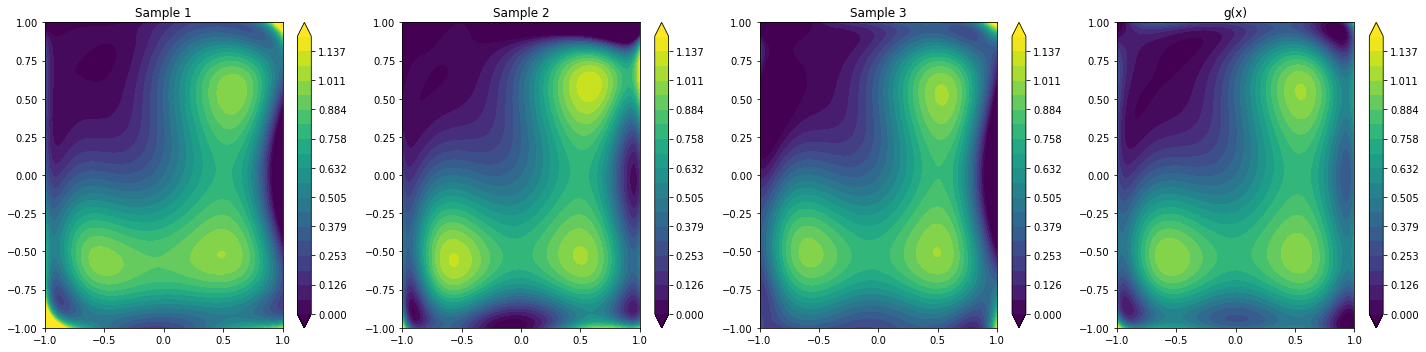

Degree= 16 lambda= 0.001
Bias = 0.006167956521881076
Variance = 0.05926650825826586
MSE = 0.06543446478014694


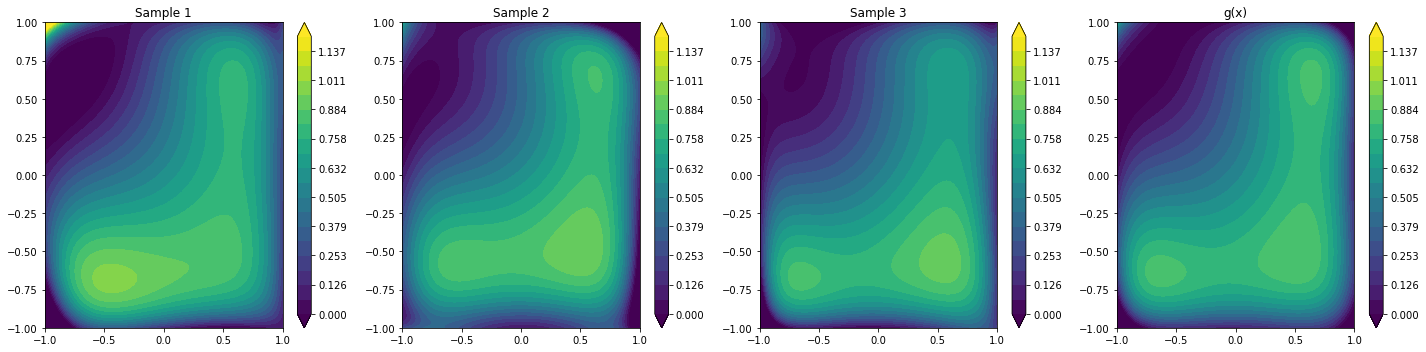

Degree= 16 lambda= 0.1
Bias = 0.012848133811961588
Variance = 0.01228775173573786
MSE = 0.02513588554769944


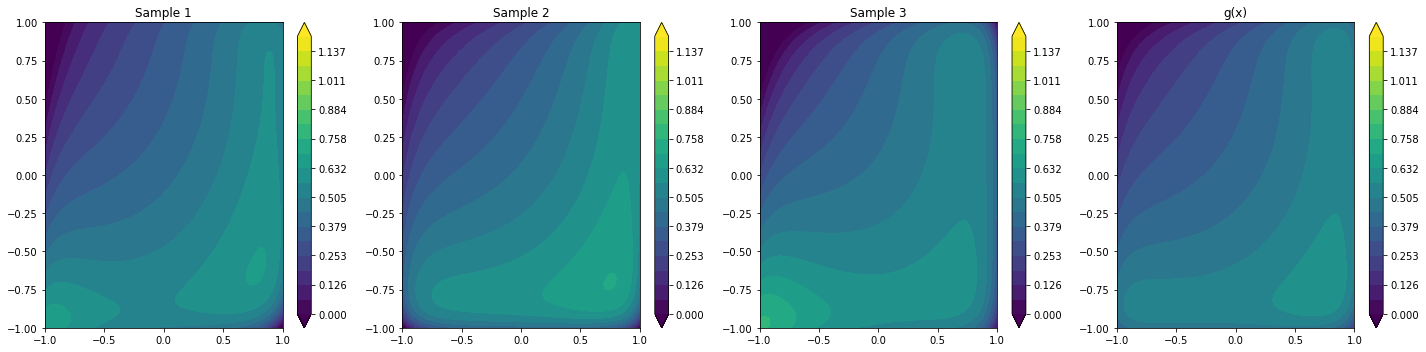

Degree= 16 lambda= 10.0
Bias = 0.053556292288602106
Variance = 0.0028439841611003166
MSE = 0.05640027644970242


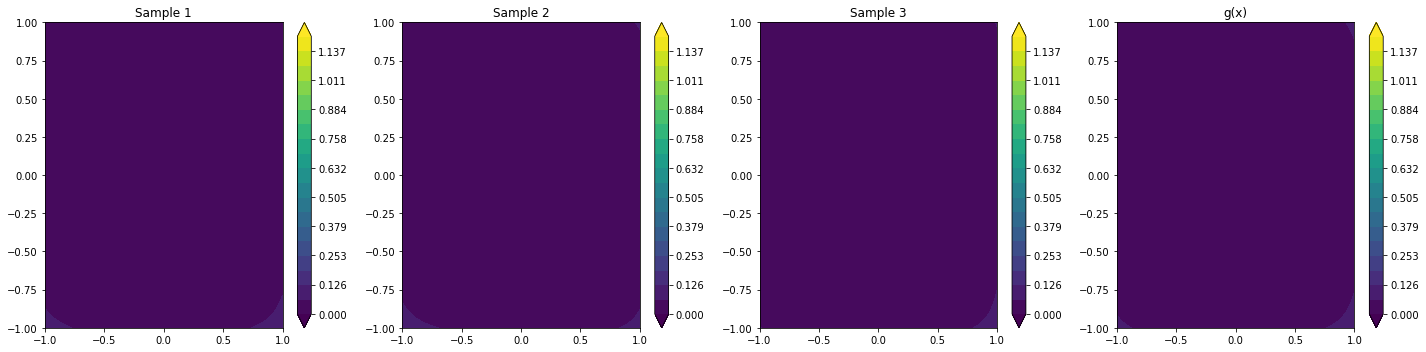

Degree= 16 lambda= 1000.0
Bias = 0.30144802919534996
Variance = 1.660000084126463e-05
MSE = 0.30146462919619116


In [95]:
# Cell type : CodeWrite

def featurevector(x,k):
    vec = []
    for r in range(k+1):
        if r == 0 :
            vec.append(1)
        else :
            for i in range(r+1) :
               vec.append((x[0]**(r-i))*(x[1]**i))
    return vec 
def Y_func(X):
    #X is of dimension (n,2) output (n,)
    a = np.array([0.5,0.5])
    b = np.array([-0.5,-0.5])
    c = np.array([0.5,-0.5])
    Y = []
    for x in X :
        temp = np.exp((np.linalg.norm(np.subtract(a,x))**2)*(-4))
        temp = temp + np.exp((np.linalg.norm(np.subtract(b,x))**2)*(-4))
        temp = temp + np.exp((np.linalg.norm(np.subtract(c,x))**2)*(-4))
        Y.append(temp)
    return np.array(Y)



def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    wt_vector = wt_vector.T  #making it d'*1
    phi = []
    for x in X_train:
        phi.append(np.array(featurevector(x,degree)))
    phi = np.array(phi)
    #phi is n*d'  and we need n*1
    
    return (np.matmul(phi,wt_vector)).T   # a 1*n output
    
    
    

    
    
def visualise_polynomial_2d(wt_vector, degree,fig,ax,title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    #wt_vector is 1*d' 
    
    Z = np.zeros([100,100])
    for i in range(100):
        for j in range(100):
            l = np.array(featurevector(np.array([X[i][j],Y[i][j]]),degree))   #this is 1*d'
            Z[i][j] = np.matmul(wt_vector,l.T)
        

    # Get Z using other functions
    
    s = ax.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),extend = 'both')
    #ax[index].title(title)
    fig.colorbar(s,ax = ax)
    ax.set_title(title)
    
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    phi = []
    for i in range(X_train.shape[0]):
        phi.append(np.array(featurevector(X_train[i],degree)))
    phi = np.array(phi)
    d = len(phi[0])
    phiTphi = np.matmul(np.transpose(phi),phi)
    lamdaI = (reg_param * np.identity(d,dtype = float))
    x = np.matmul(np.matmul((np.linalg.inv(phiTphi+lamdaI)),np.transpose(phi)),Y_train.T)
    return x.T
    
def func1(x,g):
    a = np.matmul(g,np.array(featurevector(x,degree)).T)
    #print(len(x))
    b = (Y_func([x]))[0]
    
    return (a-b)*(a-b)


def func2(x,g,f):
    a = np.matmul(g,np.array(featurevector(x,degree)).T)
    b = np.matmul(f,np.array(featurevector(x,degree)).T)
    return (a-b)*(a-b)

def func02(f,X,g):
    return np.sum(np.apply_along_axis(func2,1,X,g,f))

def func3(x,f):
    a = np.matmul(f,np.array(featurevector(x,degree)).T)
    b = (Y_func([x]))[0]
    return (a-b)*(a-b)

def func03(f,X):
    return np.sum(np.apply_along_axis(func3,1,X,f))

    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    global count
    f = []
    for i in range(100):
        x = (np.random.uniform(-1,1,50))
        y = (np.random.uniform(-1,1,50))
        X_train = np.c_[x.ravel(),y.ravel()]
        Y_train = Y_func(X_train)
        f.append(polynomial_regression_ridge_train(X_train,Y_train,degree,reg_param))
    f = np.array(f)
    g = np.sum(f,axis = 0)/100
    
    fig,ax = plt.subplots(1,4,figsize = (20,5))
    visualise_polynomial_2d(f[0],degree,fig,ax[0],'Sample 1')
    visualise_polynomial_2d(f[1],degree,fig,ax[1],'Sample 2')
    visualise_polynomial_2d(f[2],degree,fig,ax[2],'Sample 3')
    visualise_polynomial_2d(g,degree,fig,ax[3],'g(x)')
    
    plt.tight_layout()
    plt.show()
    
    #compute the variance bias mean squared error. 
    x,y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    x = x.flatten()
    y = y.flatten()
    X = np.zeros([10000,2],dtype = (float,float))
    
    for i in range(10000):
            X[i][0]= x[i]
            X[i][1] = y[i]
    
    bias_squared = np.sum(np.apply_along_axis(func1,1,X,g))

    bias_squared = (bias_squared)/(1e4)
    #print(bias_squared)
    
    variance = np.sum(np.apply_along_axis(func02,1,f,X,g))
    variance = (variance)/1e6
    
   # print(variance)
    
    mean_squared_error = np.sum(np.apply_along_axis(func03,1,f,X))
    mean_squared_error = (mean_squared_error)/1e6
        
    
    return (bias_squared,variance,mean_squared_error)
    
for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        #plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        

In [103]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.
## Bias

|Degree/$\lambda$|1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|    :----:   |   :----:  |  :----:   |    :----:   |    :----:   |    :----:   |    :----:   | 
|1|0.055276440126803994|0.05552283123918704 |0.055123265036398264|0.05519370746543444|0.06557417137223048|0.3071408522087686|
|2|0.03482775748555015|0.03485919539406666|0.03488124325577617|0.03475506467307357|0.062121785965583855|0.30361570432782836|
|4|0.007998239833341029|0.00807115672828519|0.007845788203098175|0.00936050673043018|0.060143535845065446|0.3025833435790876|
|8|0.011717169953744767|0.004682679978297925|0.007218348388794481|0.010011457707694281|0.05567079700979117|0.3012763438347996|
|16|0.03775270340610338|0.013140201004571259|0.006167956521881076|0.012848133811961588|0.053556292288602106|0.30144802919534996|

## Variance

|Degree/$\lambda$| 1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|    :----:   |   :----:  |  :----:   |    :----:   |    :----:   |    :----:   |    :----:   | 
|1|0.003449870098890979|0.00397951146225398|0.003685283409874971|0.003774523931954232|0.001372461337319142|6.04463732983218e-06|
|2|0.005596444140903804|0.005416236635197423|0.005155742524788301|0.005289604061024045|0.0020394278455440774|8.651193642272216e-06|
|4|0.007421336950929537|0.00890231327027305|0.009698656104281174|0.004486272139841806|0.002185995520014935|1.081373697196386e-05|
|8|0.22582194824602894|0.06534433315052846|0.022463121370455478|0.007274948282093627|0.0026554929743109923|1.4259035970138357e-05|
|16|0.4314630651216062|0.1932977261667089|0.05926650825826586|0.01228775173573786|0.0028439841611003166|1.660000084126463e-05|

## Mean Square Error

|Degree/$\lambda$| 1e-7|1e-5|1e-3|1e-1|1e1|1e3|
|    :----:   |   :----:  |  :----:   |    :----:   |    :----:   |    :----:   |    :----:   | 
|1|0.05872631022569499|0.05950234270144102|0.058808548446273236|0.058968231397388673| 0.06694663270954959|0.3071468968460985|
|2|0.04042420162645395|0.040275432029264084|0.040036985780564464|0.04004466873409761|0.06416121381112795|0.3036243555214706|
|4|0.015419576784270575|0.01697346999855824|0.01754444430737935|0.013846778870271987|0.06232953136508038|0.30259415731605954|
|8|0.23753911819977377|0.07002701312882637|0.029681469759249922|0.017286405989787906|0.05832628998410216|0.30129060287076975|
|16|0.4692157685277097|0.20643792717128012|0.06543446478014694|0.02513588554769944|0.05640027644970242|0.30146462919619116|

Observations:

1) Bias is increasing with the increasing the $\lambda$ and the Bias is decreasing with increase of degree and attained minimum at degree 8 , after that Bias got increased for the degree 16.

2) Variance is increasing with the increase of degree and it is decreasing with the increase of $(\lambda)$ and attained minimum when $\lambda$ = 1e1 and again increased when $\lambda$ became 1e3.


** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




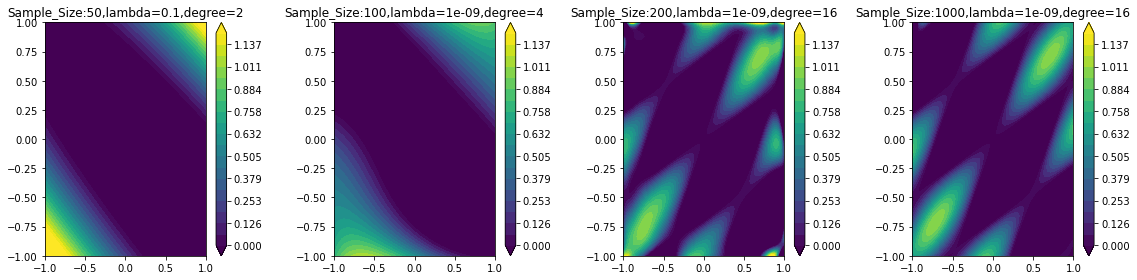

In [101]:
x = np.load("../../Data/dataset4_1.npz")
X_train = x['arr_0']
Y_train = x['arr_1']
X_test =  x['arr_2']
Y_test =  x['arr_3']

degree_list = [1,2,4,8,16]
param_list = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

def getminimum(table):
    a = 0
    b = 0
    curr = table[0][0]
    for i in range(5):
        for j in range(6):
            if(table[i][j] <= curr) :
                curr = table[i][j]
                a = i
                b = j
    return (a,b)

fig,ax = plt.subplots(1,4,figsize = (16,4))
count = 0

for n in [50,100,200,1000] :
    funlist = []
    table1 = np.zeros([5,6],dtype = 'float')
    table2 = np.zeros([5,6],dtype = 'float')
    i = 0
    for degree in degree_list:
        j = 0
        for reg_param in param_list:
            f = polynomial_regression_ridge_train(np.array(X_train[:n]),np.array(Y_train[:n]),degree,reg_param)
            funlist.append(f)
            mse = 0
            for ii in range(len(X_test)):
                a = np.matmul(f,np.array(featurevector(X_test[ii],degree)).T)
                b = Y_test[ii]
                mse = (mse+((a-b)*(a-b)))
            mse = mse/len(X_test)
            table1[i][j] = mse
            
            mse = 0
            for ii in range(len(X_train)):
                a = np.matmul(f,np.array(featurevector(X_train[ii],degree)).T)
                b = Y_train[ii]
                mse = (mse+((a-b)*(a-b)))
            mse = mse/len(X_train)
            table2[i][j] = mse
            j = (j+1)
        i = (i+1)
    (i,j) = getminimum(table1)
    #print(n)
    #print("train_matrix")
    #print(table2)
    #print("test_matrix")
    #print(table1)
    f = funlist[(i*6)+j]
    visualise_polynomial_2d(f,degree_list[i],fig,ax[count],('Sample_Size:'+str(n)+',lambda='+str(param_list[j])+',degree='+str(degree_list[i])))
    count = count+1
plt.tight_layout()
plt.show()

** Cell type : TextWrite **

| Sample Size 50 : train squared error| 
| :--------------:|

| Degree/$(\lambda)$ | 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 |
|:----:	|:----:|:----:|:----:|:----:| :----:|:----:|
| 1 |2.74261328e-01|2.74261328e-01|2.74261289e-01|2.74257421e-01|2.73873861e-01|2.53851072e-01|
| 2 |1.56399838e-01|1.56399837e-01|1.56399647e-01|1.56380706e-01|1.54700386e-01|1.91505727e-01|
| 4 |1.55416291e-01|1.55416280e-01|1.55415153e-01|1.55311509e-01|1.57679641e-01|1.80844753e-01|
| 8 |1.84691250e+02|1.31838180e+02|1.41433992e+01|7.80452117e-01|1.61423200e-01|1.78449287e-01|
| 16|1.95675211e+02|1.72670262e+02|4.95860412e+01|1.83051574e+00|1.96693671e-01|1.80274366e-01|

| Sample Size 50 : test squared error| 
| :--------------:|

| Degree/$(\lambda)$ | 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 |
|:----:	|:----:|:----:|:----:|:----:| :----:|:----:|
| 1 |3.01266818e-01|3.01266817e-01|3.01266774e-01|3.01262496e-01|3.00838224e-01|2.78350694e-01|
| 2 |1.57899989e-01|1.57899987e-01|1.57899852e-01|1.57886318e-01|1.56735259e-01|2.08223641e-01|
| 4 |1.57333966e-01|1.57333956e-01|1.57332950e-01|1.57242781e-01|1.61826388e-01|1.96568595e-01|
| 8 |2.37690058e+02|1.72501862e+02|1.85942539e+01|9.90250753e-01|1.65155762e-01|1.93918588e-01|
| 16 |2.50522444e+02|2.32024834e+02|6.66976844e+01|2.33730833e+00|2.03961457e-01|1.96057322e-01|

| Sample Size 100 : train squared error| 
| :--------------:|

| Degree/$(\lambda)$ | 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 |
|:----:	|:----:|:----:|:----:|:----:| :----:|:----:|
| 1 |0.24924461|0.24924461|0.2492446|0.24924403|0.24918733|0.2453317|
| 2 |0.1503466|0.1503466|0.15034655|0.15034165|0.14987479|0.16364578|
| 4 |0.14219307|0.14219308|0.14219312|0.14219808|0.14343342|0.15771009|
| 8 |0.5826159|0.58134698|0.47778596|0.17302199|0.15362974|0.15941299|
| 16 |40.88544648|6.42140231|8.54493032|0.27611186|0.17611051|0.16158112|

| Sample Size 100 : test squared error| 
| :--------------:|

| Degree/$(\lambda)$ | 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 |
|:----:	|:----:|:----:|:----:|:----:| :----:|:----:|
| 1 |0.27314864|0.27314864|0.27314863|0.27314798|0.27308304|0.26862154|
| 2 |0.15320993|0.15320993|0.1532099|0.15320678|0.15291576|0.17570948|
| 4 |0.14277575|0.14277576|0.14277607|0.14280764|0.14602043|0.16898019|
| 8 |0.71291635|0.71131963|0.58075914|0.20363826|0.16262758|0.17116844|
| 16 |54.08008762|11.7704202|23.41658885|0.41784851|0.18835914|0.17415997|

| Sample Size 200 : train squared error| 
| :--------------:|

| Degree/$(\lambda)$ | 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 |
|:----:	|:----:|:----:|:----:|:----:| :----:|:----:|
| 1 |0.24607272|0.24607272|0.24607272|0.24607257|0.24605756|0.24480824|
|2|0.1427385|0.1427385|0.14273849|0.14273747|0.14263977|0.15041158|
|4|0.13227259|0.13227259|0.13227243|0.13225662|0.13110941|0.14861957|
|8|0.11278002|0.11277783|0.11256118|0.10231635|0.11410717|0.1477115| 
|16|0.018534|0.03777313|0.05960355|0.07405987|0.108204|0.14398146|

| Sample Size 200 : test squared error| 
| :--------------:|

| Degree/$(\lambda)$ | 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 |
|:----:	|:----:|:----:|:----:|:----:| :----:|:----:|
| 1 |0.26766305|0.26766305|0.26766305|0.26766288|0.26764571|0.26622547|
|2 |0.14578065|0.14578065|0.14578065|0.14578035|0.14575448|0.15868223|
|4|0.13117097|0.13117097|0.1311709|0.13116415|0.13083053|0.15708512|
|8 |0.13736299|0.13735918|0.13698205|0.11818259|0.11396536|0.15645118|
|16|0.03714985|0.08371021|0.17080666|0.0869037|0.11121403|0.15224401|

| Sample Size 1000 : train squared error| 
| :--------------:|

| Degree/$(\lambda)$ | 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 |
|:----:	|:----:|:----:|:----:|:----:| :----:|:----:|
| 1 |2.40728219e-01|2.40728219e-01|2.40728219e-01|2.40728219e-01|2.40728219e-01|2.40728718e-01|
|2|1.38824103e-01|1.38824103e-01|1.38824103e-01|1.38824103e-01|1.38824212e-01|1.39718023e-01|
|4|1.25017242e-01|1.25017242e-01|1.25017242e-01|1.25017243e-01|1.25025116e-01 |1.34172029e-01|
|8|7.67428535e-02|7.67428535e-02|7.67428671e-02|7.68462164e-02|9.48380319e-02|1.28438228e-01|
|16|2.54861492e-05|4.45126833e-04|6.53349064e-03|3.84153399e-02|8.49925763e-02|1.21687324e-01|

| Sample Size 1000 : test squared error| 
| :--------------:|

| Degree/$(\lambda)$ | 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 |
|:----:	|:----:|:----:|:----:|:----:| :----:|:----:|
| 1 |0.26253465|0.26253465|0.26253465|0.26253465|0.2625346|0.2625303|
|2|0.14242932|0.14242932|0.14242932|0.14242945|0.14244207|0.14451885|
|4|0.12707963|0.12707963|0.12707964|0.12708121|0.12724209|0.14093659|
|8|0.08481274|0.08481261|0.08480025|0.08391324|0.09782269|0.13498892|
|16|0.00119774|0.00149007|0.01095719|0.04965813|0.0907374|0.1278209|

Observations:

1) For less Sample_Size the test squared error is higher when the degree is higher and similarly for the big Sample_Size the test squared error is higher when the degree is lower .

2) So this means that when the data points are less and we are choosing a higher degree then overfitting is happening and which is resulting in the higher error.

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












Sample size - 4 points 


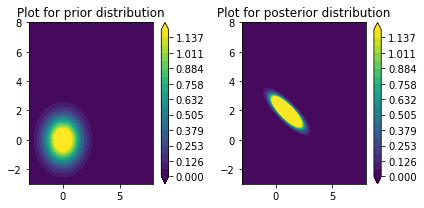

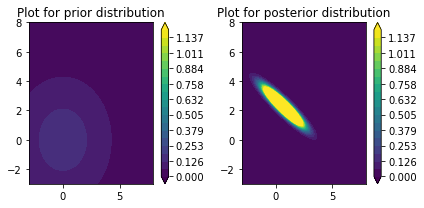

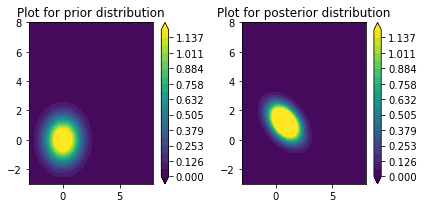

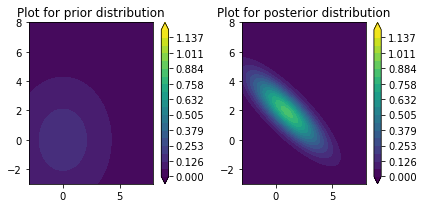

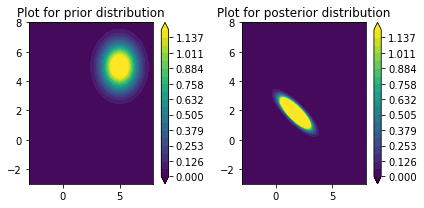

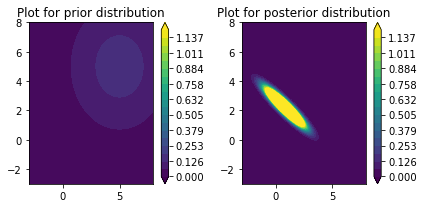

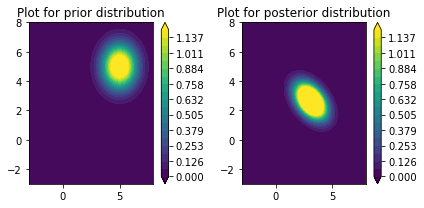

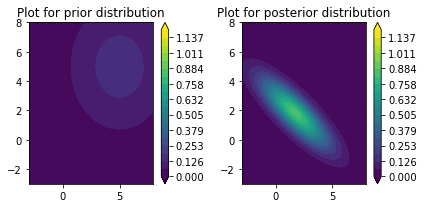

Sample size - 400 points 


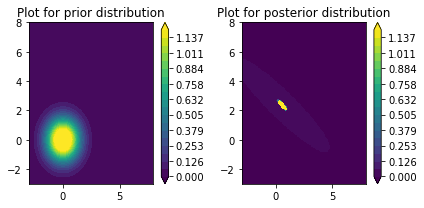

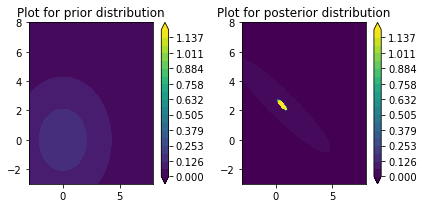

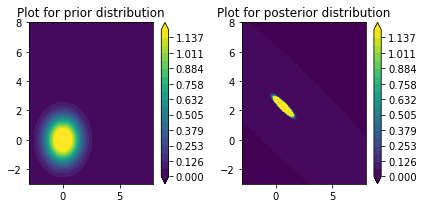

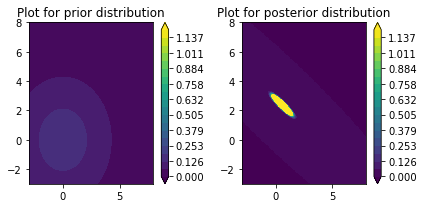

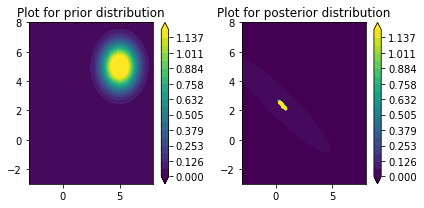

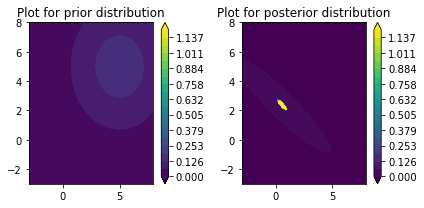

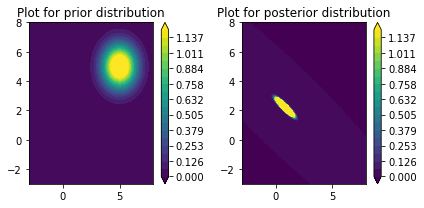

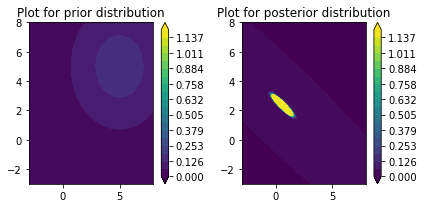

In [104]:
# Cell type : CodeWrite 

def print_normaldistribution(mean,sigma,fig,ax,title=""):
    
     X,Y = np.meshgrid(np.linspace(-3,8,100), np.linspace(-3,8,100))
     
     sigmainv = np.linalg.inv(sigma)
     a = 1/np.sqrt(abs(np.linalg.det(sigma)))
     a = (a/2*np.pi)
     Z = np.zeros([100,100])
     for i in range(100):
        for j in range(100):
            x = np.array([X[i][j],Y[i][j]])
            Z[i][j] = (a*np.exp((np.matmul(np.matmul(x-mean.T,sigmainv),x-mean)* (-1))/2))
            
     s = ax.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),extend = 'both')
    #ax[index].title(title)
     fig.colorbar(s,ax = ax)
     ax.set_title(title)
    
    
X = []
Y = []

for i in range(100):
    for (a,b,c) in [(1.0,2.0,5.1),(2.0,2.1,6.1),(0.6,1.5,4.2),(1.1, 0.9,2.9)] :
        X.append(np.array([a,b]))
        Y.append(c)
A = X[:4]
B = Y[:4]
A = np.array(A)
B = np.array(B)

print("Sample size - 4 points ")

for (mu1,mu2) in [(0,0),(5,5)]:
     for (tow2,sig2) in [(1,1),(10,1),(1,10),(10,10)]:
        fig,ax = plt.subplots(1,2,figsize = (6,3))
        #for prior distribution
        print_normaldistribution(np.array([mu1,mu2]),tow2*np.identity(2),fig,ax[0],'Plot for prior distribution')
        
        lamda = (sig2*1.0)/tow2
        temp = np.matmul(A.T,A)+lamda*np.identity(2)
        temp = np.linalg.inv(temp)
        sigma = sig2*temp
        
        temp = np.array([mu1,mu2])/(tow2*1.0)
        temp = temp.T + (1.0/sig2)*(np.matmul(A.T,B))
        mean = np.matmul(sigma,temp).T
        
        print_normaldistribution(mean,sigma,fig,ax[1],'Plot for posterior distribution')
        
        plt.tight_layout()
        plt.show()



X = np.array(X)
Y = np.array(Y)


print("Sample size - 400 points ")


for (mu1,mu2) in [(0,0),(5,5)]:
     for (tow2,sig2) in [(1,1),(10,1),(1,10),(10,10)]:
        fig,ax = plt.subplots(1,2,figsize = (6,3))
        #for prior distribution
        print_normaldistribution(np.array([mu1,mu2]),tow2*np.identity(2),fig,ax[0],'Plot for prior distribution')
        
        lamda = (sig2*1.0)/tow2
        temp = np.matmul(X.T,X)+lamda*np.identity(2)
        temp = np.linalg.inv(temp)
        sigma = sig2*temp
        
        temp = np.array([mu1,mu2])/(tow2*1.0)
        temp = temp.T + (1.0/sig2)*(np.matmul(X.T,Y))
        mean = np.matmul(sigma,temp).T
        
        print_normaldistribution(mean,sigma,fig,ax[1],'Plot for posterior distribution')
        
        plt.tight_layout()
        plt.show()
 



** Cell type : TextWrite **

Observations :

1) The Plot of the Posterior distribution is affected by sample size and it is spreaded when the sample size is 4 , but when the sample size is 400 the plot is not distributed well , it basically means the high trust on the sample data points when the sample_point size is high.

2) With the high $\tau$ the plot of prior distribution got spreaded more which is indicating the low trust on prior knowledge. 

3) With the high $\sigma$ the plot of prior distribution got spreaded more which is indicating the low trust on sample data that we are using.
